In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# EDA

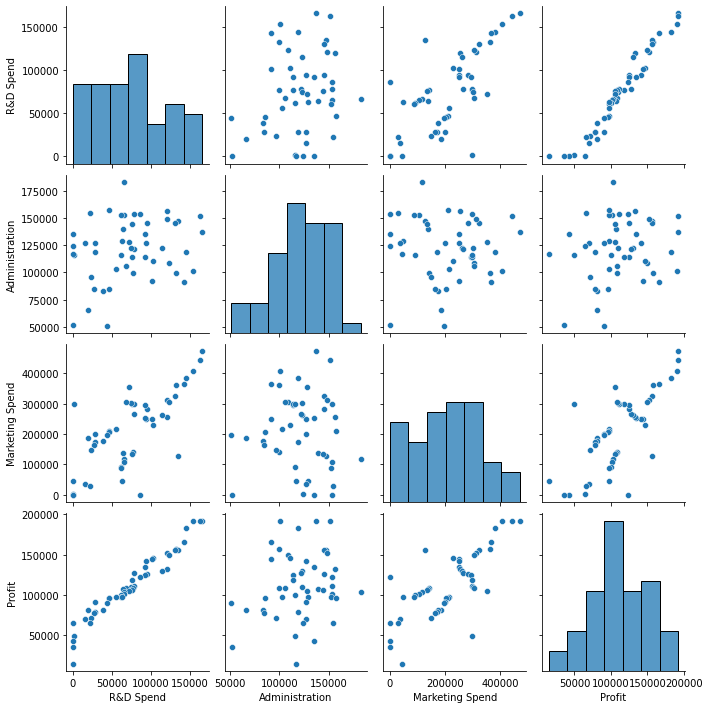

In [6]:
sns.pairplot(dataset)

<AxesSubplot:>

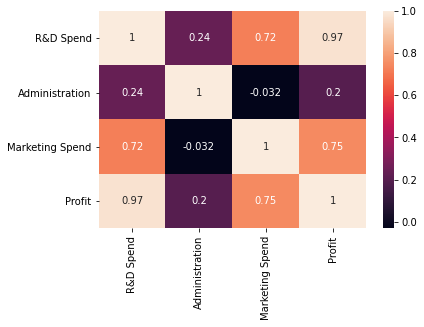

In [8]:
sns.heatmap(dataset.corr(),annot=True)

# Train Test Split

In [9]:
X = dataset[["R&D Spend", "Administration", "Marketing Spend", "State"]]
y = dataset["Profit"]
X,y

(    R&D Spend  Administration  Marketing Spend       State
 0   165349.20       136897.80        471784.10    New York
 1   162597.70       151377.59        443898.53  California
 2   153441.51       101145.55        407934.54     Florida
 3   144372.41       118671.85        383199.62    New York
 4   142107.34        91391.77        366168.42     Florida
 5   131876.90        99814.71        362861.36    New York
 6   134615.46       147198.87        127716.82  California
 7   130298.13       145530.06        323876.68     Florida
 8   120542.52       148718.95        311613.29    New York
 9   123334.88       108679.17        304981.62  California
 10  101913.08       110594.11        229160.95     Florida
 11  100671.96        91790.61        249744.55  California
 12   93863.75       127320.38        249839.44     Florida
 13   91992.39       135495.07        252664.93  California
 14  119943.24       156547.42        256512.92     Florida
 15  114523.61       122616.84        26

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
X_train

,R&D Spend,Administration,Marketing Spend,State
3,144372.41,118671.85,383199.62,New York
41,27892.92,84710.77,164470.71,Florida
30,61994.48,115641.28,91131.24,Florida
15,114523.61,122616.84,261776.23,New York
20,76253.86,113867.30,298664.47,California
43,15505.73,127382.30,35534.17,New York
38,20229.59,65947.93,185265.10,New York
44,22177.74,154806.14,28334.72,California
39,38558.51,82982.09,174999.30,California
10,101913.08,110594.11,229160.95,Florida


In [12]:
X_test

,R&D Spend,Administration,Marketing Spend,State
37,44069.95,51283.14,197029.42,California
14,119943.24,156547.42,256512.92,Florida
21,78389.47,153773.43,299737.29,New York
32,63408.86,129219.61,46085.25,California
22,73994.56,122782.75,303319.26,Florida
1,162597.70,151377.59,443898.53,California
26,75328.87,144135.98,134050.07,Florida
46,1315.46,115816.21,297114.46,Florida
42,23640.93,96189.63,148001.11,California
47,0.00,135426.92,0.00,California


In [13]:
y_train

3     182901.99
41     77798.83
30     99937.59
15    129917.04
20    118474.03
43     69758.98
38     81229.06
44     65200.33
39     81005.76
10    146121.95
49     14681.40
25    107404.34
33     96778.92
36     90708.19
2     191050.39
27    105008.31
34     96712.80
35     96479.51
8     152211.77
19    122776.86
29    101004.64
12    141585.52
5     156991.12
0     192261.83
28    103282.38
4     166187.94
40     78239.91
13    134307.35
9     149759.96
48     35673.41
23    108733.99
6     156122.51
17    125370.37
11    144259.40
31     97483.56
Name: Profit, dtype: float64

In [14]:
y_test

37     89949.14
14    132602.65
21    111313.02
32     97427.84
22    110352.25
1     191792.06
26    105733.54
46     49490.75
42     71498.49
47     42559.73
16    126992.93
24    108552.04
7     155752.60
45     64926.08
18    124266.90
Name: Profit, dtype: float64